<a href="https://colab.research.google.com/github/marllinkang/machine-learning/blob/main/dl_Alzhemier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -qq '/content/drive/MyDrive/test _ws/deep learning/Alzheimer.zip'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#1.15 data generator 설정

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip = True,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1)

In [ ]:
#1.16 폴더에서 데이터 읽기

In [ ]:
train_generator = train_datagen.flow_from_directory(
    './data-ch20-master/train', #/content/data-ch20-master/train 인데 .을 붙여서 현재 위치
    target_size =(150, 150),
    batch_size = 5,
    class_mode = 'binary')

Found 160 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    './data-ch20-master/test',
    target_size =(150,150),
    batch_size =5,
    class_mode ='binary')

Found 120 images belonging to 2 classes.


In [ ]:
#1.18 일단 CNN으로~

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3, 3), input_shape =(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x787f83c701c0>>

In [ ]:
#1.19 학습에 필요한 설정

model.compile(loss ='binary_crossentropy',optimizer= optimizers.Adam(learning_rate = 0.0002),
              metrics=['accuracy'])

In [ ]:
#1.20 고고

In [ ]:
history = model.fit(
    train_generator,
    epochs = 100,
    validation_data = test_generator,
    validation_steps = 10)

Epoch 1/100
32/32 [==============================] - 14s 39ms/step - loss: 0.7075 - accuracy: 0.4812 - val_loss: 0.6912 - val_accuracy: 0.6200
Epoch 2/100
32/32 [==============================] - 2s 58ms/step - loss: 0.6866 - accuracy: 0.5312 - val_loss: 0.7023 - val_accuracy: 0.4600
Epoch 3/100
32/32 [==============================] - 1s 45ms/step - loss: 0.6977 - accuracy: 0.4812 - val_loss: 0.6888 - val_accuracy: 0.5200
Epoch 4/100
32/32 [==============================] - 1s 31ms/step - loss: 0.6910 - accuracy: 0.5312 - val_loss: 0.6801 - val_accuracy: 0.7000
Epoch 5/100
32/32 [==============================] - 1s 32ms/step - loss: 0.6923 - accuracy: 0.5625 - val_loss: 0.6827 - val_accuracy: 0.5600
Epoch 6/100
32/32 [==============================] - 1s 32ms/step - loss: 0.6788 - accuracy: 0.6313 - val_loss: 0.6658 - val_accuracy: 0.7800
Epoch 7/100
32/32 [==============================] - 1s 32ms/step - loss: 0.6769 - accuracy: 0.5813 - val_loss: 0.6400 - val_accuracy: 0.7800
Epoch

In [ ]:
#1.21 학습 성과를 그려보자
#1.22 뭔가 열심히 학습한듯하다

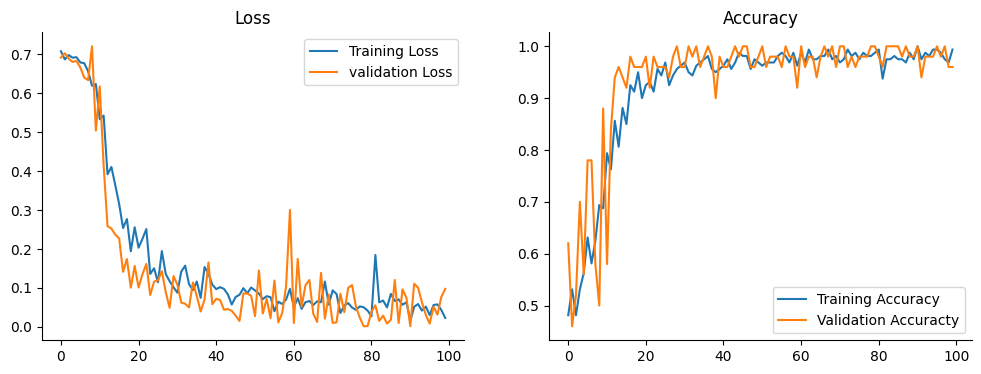

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize =(12, 4))

sns.lineplot(x = range(len(history.history["loss"])),
             y = history.history["loss"],ax = axes[0],
             label = "Training Loss")
sns.lineplot(x = range(len(history.history["loss"])),
             y= history.history["val_loss"],ax =axes[0],
             label ="validation Loss")

sns.lineplot(x = range(len(history.history["accuracy"])),
             y = history.history["accuracy"],ax = axes[1],
             label = "Training Accuracy")
sns.lineplot(x= range(len(history.history["accuracy"])),
             y= history.history["val_accuracy"], ax = axes[1],
             label ="Validation Accuracty")
axes[0].set_title("Loss");axes[1].set_title("Accuracy")

sns.despine()
plt.show()

In [ ]:
#2 전이학습

In [ ]:
# imort

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#2.2 VGG16을 부르자

In [ ]:
transfer_model = VGG16(weights = 'imagenet',include_top = False, input_shape= (150, 150, 3 ))
transfer_model.trainable = False
transfer_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
# 2.3 모델 재구성

In [ ]:
finetune_model = models.Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64))
finetune_model.add(Activation('relu'))
finetune_model.add(Dropout(0.5))
finetune_model.add(Dense(1))
finetune_model.add(Activation('sigmoid'))
finetune_model.summary()
#2.4 이렇게 생겼다

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                524352    
                                                                 
 activation_5 (Activation)   (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
 activation_6 (Activation)   (None, 1)                

In [ ]:
#2.5 학습시작

In [ ]:
finetune_model.compile(loss = 'binary_crossentropy',optimizer = optimizers.Adam(learning_rate = 0.0002),
                       metrics=['accuracy'])

history = finetune_model.fit(
    train_generator,
    epochs =20,
    validation_data = test_generator,
    validation_steps =10)


Epoch 1/20
32/32 [==============================] - 4s 54ms/step - loss: 0.7832 - accuracy: 0.5125 - val_loss: 0.5493 - val_accuracy: 0.8200
Epoch 2/20
32/32 [==============================] - 1s 41ms/step - loss: 0.5543 - accuracy: 0.7437 - val_loss: 0.4519 - val_accuracy: 0.8800
Epoch 3/20
32/32 [==============================] - 1s 41ms/step - loss: 0.4822 - accuracy: 0.8000 - val_loss: 0.4158 - val_accuracy: 0.8800
Epoch 4/20
32/32 [==============================] - 1s 41ms/step - loss: 0.4039 - accuracy: 0.8250 - val_loss: 0.3519 - val_accuracy: 0.9200
Epoch 5/20
32/32 [==============================] - 1s 42ms/step - loss: 0.3771 - accuracy: 0.8625 - val_loss: 0.3220 - val_accuracy: 0.9400
Epoch 6/20
32/32 [==============================] - 2s 66ms/step - loss: 0.3347 - accuracy: 0.8687 - val_loss: 0.3088 - val_accuracy: 0.9400
Epoch 7/20
32/32 [==============================] - 1s 46ms/step - loss: 0.3160 - accuracy: 0.8750 - val_loss: 0.3206 - val_accuracy: 0.9000
Epoch 8/20
32

In [ ]:
#2.6 뭐 이렇게 다시 성능을 확인하려고 하면

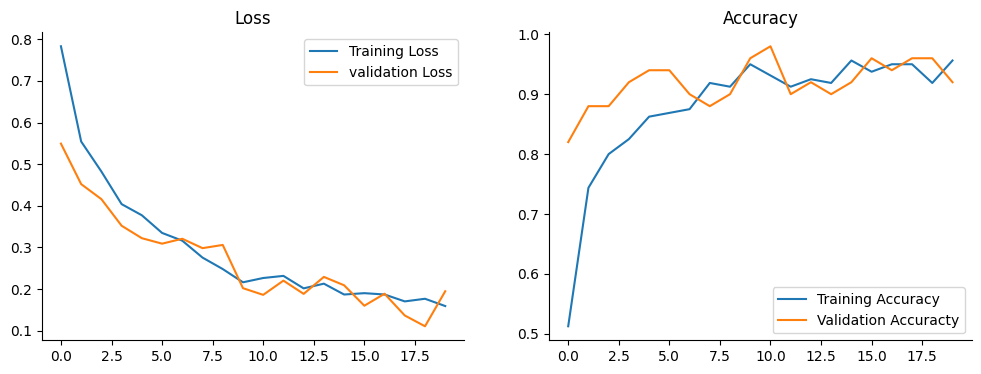

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize =(12, 4))

sns.lineplot(x = range(len(history.history["loss"])),
             y = history.history["loss"], ax = axes[0],
             label = "Training Loss")
sns.lineplot(x = range(len(history.history["loss"])),
             y = history.history["val_loss"], ax = axes[0],
             label = "validation Loss")

sns.lineplot(x = range(len(history.history["accuracy"])),
             y = history.history["accuracy"],ax = axes[1],
             label = "Training Accuracy")
sns.lineplot(x= range(len(history.history["accuracy"])),
             y= history.history["val_accuracy"], ax = axes[1],
             label ="Validation Accuracty")
axes[0].set_title("Loss");axes[1].set_title("Accuracy")

sns.despine()
plt.show()

In [ ]:
# 주어진 코드는 Matplotlib와 Seaborn을 사용하여 훈련 과정 동안 훈련 손실, 검증 손실, 훈련 정확도 및 검증 정확도를 시각화하는 그래프를 생성하는 부분입니다. 코드를 설명하겠습니다:

# fig, axes = plt.subplots(1, 2, figsize=(12, 4)): Matplotlib를 사용하여 1x2 그리드의 하위 그래프(subplots)를 생성합니다. 두 개의 그래프를 나란히 그리기 위해 사용됩니다. fig는 전체 그림, axes는 각각의 서브 플롯을 나타내는 배열입니다. 그림의 크기는 (12, 4)로 설정됩니다.

# sns.lineplot(...): Seaborn의 lineplot 함수를 사용하여 선 그래프를 생성합니다. 코드에서는 훈련 손실, 검증 손실, 훈련 정확도 및 검증 정확도를 그래프로 표시합니다. 각 sns.lineplot 호출은 각각의 그래프를 생성합니다.

# axes[0].set_title("Loss"); axes[1].set_title("Accuracy"): 각각의 서브 플롯에 제목을 설정합니다. 첫 번째 서브 플롯에는 "Loss"가, 두 번째 서브 플롯에는 "Accuracy"가 제목으로 표시됩니다.

# sns.despine(): 그래프 주변의 축을 제거하여 그래프를 더 깔끔하게 만듭니다.

# plt.show(): 그래프를 화면에 출력합니다.

# 이 코드를 실행하면 훈련 과정 동안 손실과 정확도의 변화를 시각적으로 확인할 수 있으며, 모델의 훈련 상태를 평가하고 향상시키는 데 도움이 됩니다.